<h1> Poetry Generation using Deep Learning</h1>
    - Kashish

<h3>Problem Statement</h2>
We have a collection of Poems lets say Irish Poems, we want to built a Deep Learning System that could generate similar Poems.

<h3>Collecting the Data</h3>
<h5>Data:</h5>
Our data is a collection of Irish poems, and we fetched it from the following link<br>
  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt


In [2]:
!wget --no-check-certificate \ https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt \ -O irish_poetry.txt

--2022-01-29 14:24:30--  http://%5C/
Resolving \\ (\\)... failed: No such host is known. .
wget: unable to resolve host address '\\'
--2022-01-29 14:24:30--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 216.58.196.208, 142.250.194.80, 142.250.194.48, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|216.58.196.208|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: 'irish_poetry.txt'

     0K .......... .......... .......... .......... .......... 74%  377K 0s
    50K .......... .......                                    100%  207K=0.2s

2022-01-29 14:24:31 (311 KB/s) - 'irish_poetry.txt' saved [68970/68970]

--2022-01-29 14:24:31--  http://%5C/
Resolving \\ (\\)... failed: No such host is known. .
wget: unable to resolve host address '\\'
FINISHED --2022-01-29 14:

<h5>Data Sample</h5>
"Come all ye maidens young and fair
And you that are blooming in your prime
Always beware and keep your garden fair
Let no man steal away your thyme
For thyme it is a precious thing
And thyme brings all things to my mind ... "


In [2]:
raw_data = open(r"../Poetry_Generation/irish_poetry.txt", encoding="utf-8").read()
raw_data = raw_data.lower().split("\n")[:-1]
raw_data[0:10]


['come all ye maidens young and fair',
 'and you that are blooming in your prime',
 'always beware and keep your garden fair',
 'let no man steal away your thyme',
 'for thyme it is a precious thing',
 'and thyme brings all things to my mind',
 'nlyme with all its flavours, along with all its joys',
 'thyme, brings all things to my mind',
 'once i and a bunch of thyme',
 'i thought it never would decay']

<h3>Exploratory Data Analysis</h3>


In [3]:
# count no. of lines in dataset
print("Number of poem lines in dataset : {}".format(len(raw_data) - 1))


Number of poem lines in dataset : 1691


In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer


In [5]:
# count no. of unique words in dataset
tokenizer = Tokenizer()
tokenizer.fit_on_texts(raw_data)
print("Number of unique words in dataset : {}".format(len(tokenizer.word_index)))


Number of unique words in dataset : 2689


In [6]:
# finding minimum and maximum no. of words in a sentence
data_tokenized = tokenizer.texts_to_sequences(raw_data)
lines_length = [len(sentence) for sentence in data_tokenized]
print(
    "Max length of a sentence : {}\nMin length of a sentence : {}".format(
        max(lines_length), min(lines_length)
    )
)


Max length of a sentence : 16
Min length of a sentence : 2


In [7]:
# plot a graph (  what against what )
from matplotlib.pyplot import hist, show, title, xlabel, ylabel, grid
from numpy import arange


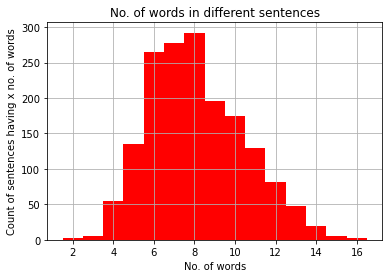

In [8]:
hist(lines_length, bins=arange(2, 18) - 0.5, facecolor="r")
title("No. of words in different sentences")
xlabel("No. of words")
ylabel("Count of sentences having x no. of words")
grid(True)
show()


<h3>Prepare the data to feed to model for training<h3>

<h5>Steps:</h5>

1. Tokenizing the data, using a word tokenizer.
2. Create n-gram sequences.
3. Pre-padding the sentences to make them of equal lengths.
4. Splitting the last word from each sentence to form label.

For example:

<li> Sentence: 'Come all ye maidens young and fair'</l1><br><br>
<li> Step-1: [51, 12, 96, 1217, 48, 2, 69]</li><br>
<li> Step-2: <br>&emsp;[51, 12],<br>&emsp;[51, 12, 96],<br>&emsp;[51, 12, 96, 1217],<br>&emsp;[51, 12, 96, 1217, 48],<br>&emsp;[51, 12, 96, 1217, 48, 2],<br>&emsp;[51, 12, 96, 1217, 48, 2, 69],</li><br>
<li> Step-3:<br>&emsp;[ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 51, 12]<br>&emsp;[ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 51, 12, 96]<br>&emsp;[ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 51, 12, 96, 1217]<br>&emsp;[ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 51, 12, 96, 1217, 48]</br>&emsp;[ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 51, 12, 96, 1217, 48, 2]<br>&emsp;[ 0, 0, 0, 0, 0, 0, 0, 0, 0, 51, 12, 96, 1217, 48, 2, 69]</li><br>
<li> Step-4: Final training sequences and labels.<br>&emsp;[ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 51, 12] &emsp;12<br>&emsp;[ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 51, 12, 96]&emsp;96<br>&emsp;[ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 51, 12, 96, 1217]&emsp;1217<br>&emsp;[ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 51, 12, 96, 1217, 48]&emsp;48<br>&emsp;[ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 51, 12, 96, 1217, 48, 2]&emsp;2<br>&emsp;[ 0, 0, 0, 0, 0, 0, 0, 0, 0, 51, 12, 96, 1217, 48, 2, 69]&emsp;69<br>&emsp;</li>


In [9]:
# tokenizer the data using Tokenizer from tensorflow.keras.preprocessing.text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(raw_data)
data_tokenized = tokenizer.texts_to_sequences(raw_data)


<h5>Creating N-gram Sequences </h5>


In [10]:
training_sequences = []
for sequence in data_tokenized:
    for i in range(2, len(sequence) + 1):
        training_sequences.append(sequence[:i])


<h5>Padding the data with zeros.</h5>


In [11]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

padded_sequences = pad_sequences(sequences=training_sequences)


prepare the training data


In [12]:
x_train, y_train = padded_sequences[:, :-1], padded_sequences[:, -1]


<h5>Training the Model</h5>
We are using a Sequential model with the following layers:

1. Embedding
2. Bidirectional LSTM
3. Dropout
4. LSTM
5. Dense
6. Dense

The parameters used are :

<li>vocab_size=len(tokenizer.word_index)+1
<li>wv_dims=100
<li>input_length=x_train.shape[1]
<li>dropout_rate=0.2
<li>lstm_units=128
<li>regularization_rate=0.01
<li>epochs=50


In [13]:
# setting the parameters for model with Bidirectional LSTM and LSTM layers
vocab_size = len(tokenizer.word_index) + 1
wv_dims = 100
input_length = x_train.shape[1]
dropout_rate = 0.2
lstm_units = 128
regularization_rate = 0.01
epochs = 50


In [14]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dropout, Dense
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ModelCheckpoint


In [16]:
model = Sequential()
model.add(Embedding(vocab_size, wv_dims, input_length=input_length))
model.add(Bidirectional(LSTM(lstm_units, return_sequences=True)))
model.add(Dropout(dropout_rate))
model.add(LSTM(lstm_units))
model.add(
    Dense(
        vocab_size // 4,
        activation="relu",
        activity_regularizer=regularizers.L2(regularization_rate),
    )
)
model.add(Dense(vocab_size, activation="softmax"))
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)
checkpoint = ModelCheckpoint(
    "../Poetry_Generation/poetry_model_bidrec_LSTM.weights.best.hdf5",
    monitor="val_accuracy",
    verbose=1,
    save_best_only=True,
    mode="max",
)
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 15, 100)           269000    
                                                                 
 bidirectional_1 (Bidirectio  (None, 15, 256)          234496    
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 15, 256)           0         
                                                                 
 lstm_3 (LSTM)               (None, 128)               197120    
                                                                 
 dense_2 (Dense)             (None, 672)               86688     
                                                                 
 dense_3 (Dense)             (None, 2690)              1810370   
                                                      

In [17]:
# train the model
history = model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    verbose=1,
    epochs=epochs,
    callbacks=[checkpoint],
)


Epoch 1/50
301/301 [==============================] - ETA: 0s - loss: 6.7991 - accuracy: 0.0626
Epoch 00001: val_accuracy improved from -inf to 0.07558, saving model to ../Poetry_Generation\poetry_model_bidrec_LSTM.weights.best.hdf5
301/301 [==============================] - 29s 73ms/step - loss: 6.7991 - accuracy: 0.0626 - val_loss: 6.7137 - val_accuracy: 0.0756
Epoch 2/50
301/301 [==============================] - ETA: 0s - loss: 6.2371 - accuracy: 0.0681
Epoch 00002: val_accuracy improved from 0.07558 to 0.08513, saving model to ../Poetry_Generation\poetry_model_bidrec_LSTM.weights.best.hdf5
301/301 [==============================] - 23s 78ms/step - loss: 6.2371 - accuracy: 0.0681 - val_loss: 6.7452 - val_accuracy: 0.0851
Epoch 3/50
301/301 [==============================] - ETA: 0s - loss: 6.0043 - accuracy: 0.0780
Epoch 00003: val_accuracy did not improve from 0.08513
301/301 [==============================] - 26s 85ms/step - loss: 6.0043 - accuracy: 0.0780 - val_loss: 6.8311 - va

In [24]:
from matplotlib.pyplot import figure, plot, title, ylabel, xlabel, legend, subplot


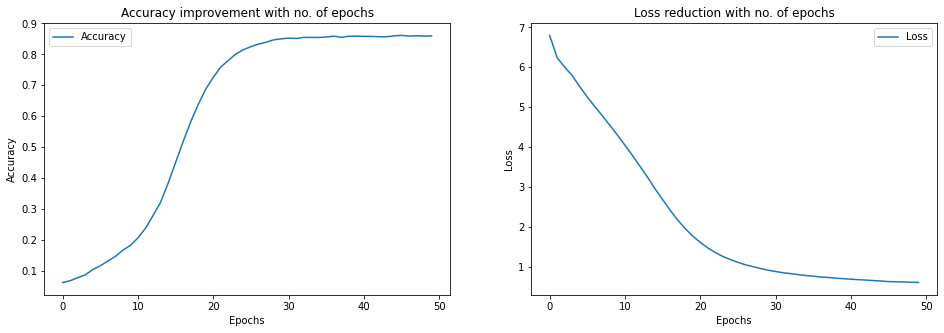

In [32]:
# plotting the graphs
figure(figsize=(16, 5))
subplot(121)
title("Accuracy improvement with no. of epochs")
plot(history.history["accuracy"])
ylabel("Accuracy")
xlabel("Epochs")
legend(["Accuracy"])
subplot(122)
title("Loss reduction with no. of epochs")
plot(history.history["loss"])
ylabel("Loss")
xlabel("Epochs")
legend(["Loss"])
show()


<h5>Generate text using learned model</h5>


In [33]:
from numpy import argmax


In [34]:
def generate_text(seed_text, next_words):
    for _ in range(next_words):
        tokenized_string = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([tokenized_string], maxlen=x_train.shape[1])
        predicted = argmax(model.predict(token_list, verbose=0), axis=-1)
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += " " + output_word
    return seed_text


<h5>Example 1</h5>


In [35]:
seed_text = "Oh once great men have fallen"
generate_text(seed_text=seed_text, next_words=100)


'Oh once great men have fallen i love no more till i took a small drop too much i suppose will see no more dead me that dhu you may encumbered till a fair maid in the town of blarney your wife rude and wild march in our eyes water wrath lies bright and late in my step might break your rest her high fellows of toome today to go very little ditty but i thought it be a pity of peace attend thee and i have none so be forever by your and lines as our eyes and our lips mary and the love light'

In [36]:
generate_text("", 100)


' i know you love me kathleen dear meet me bond dead and she well i have this proud old woman did say my hair enthralled rude and high motion at night with their fathers my arms young bore a sunday young were a tear in my eyes glisten were sport and all and stainless then i to reap the quality leave where i was born in ballyjamesduff its there in by spancil hill and even when i will be aisey first in me town and thou your drums and guns and drums and guns and drums and guns and drums'

In [37]:
generate_text("Thyme, brings all things to my mind", 100)


'Thyme, brings all things to my mind would fall bring me blame and he begged for forgiveness i fought to save my jewels seeing desolation round a cask de dow corporal casey me corporal casey me mbó twined play still you your true love say then wid you a fore wid his flute lines play he sets with a county down oer the swell white hand and me in me home i started by daylight bragh as we night out of a juice of the barley and the bran above the pale sands the pale stars above the thorn tree to dublin town in pray wid you'